In [2]:
import numpy as np 
import pandas as pd 


In [3]:
df1=pd.read_csv("calories.csv")
df2=pd.read_csv("exercise.csv")


In [4]:
df2.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [5]:
df1.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [6]:
df=pd.concat([df2, df1], axis=1)

In [7]:
df.to_csv("final_dataset.csv",index=False)

Load Final dataset

In [8]:
df=pd.read_csv("final_dataset.csv")
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID.1,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   User_ID.1   15000 non-null  int64  
 9   Calories    15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID.1,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,1.497736e+07,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,2.872851e+06,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000116e+07,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,1.247419e+07,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,1.499728e+07,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,1.744928e+07,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,1.999965e+07,314.000000


In [11]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
User_ID.1     0
Calories      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(15000, 10)

In [14]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'User_ID.1', 'Calories'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
la=LabelEncoder()
df["Gender"] = la.fit_transform(df["Gender"])


In [65]:
df

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories
0,1,0.813559,0.965517,0.622951,0.840909,0.734824
1,0,0.000000,0.448276,0.442623,0.727273,0.207668
2,1,0.830508,0.137931,0.344262,0.363636,0.079872
3,0,0.237288,0.413793,0.540984,0.772727,0.223642
4,0,0.118644,0.310345,0.229508,0.613636,0.108626
...,...,...,...,...,...,...
14995,0,0.000000,0.344828,0.409836,0.750000,0.140575
14996,0,0.118644,0.172414,0.295082,0.477273,0.070288
14997,0,0.389831,0.517241,0.377049,0.681818,0.236422
14998,1,0.983051,0.034483,0.278689,0.272727,0.031949


Feature Extraction

In [17]:
correlation = df.corr()

# Display correlation between input features and target
print(correlation['Calories'])  


User_ID      -0.001661
Gender        0.022357
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
User_ID.1    -0.001661
Calories      1.000000
Name: Calories, dtype: float64


In [19]:
df.drop(columns=["User_ID","Height","Weight","User_ID.1"],inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df["Age"] = scaling.fit_transform(df[["Age"]])
df["Duration"]=scaling.fit_transform(df[["Duration"]])
df["Heart_Rate"]=scaling.fit_transform(df[["Heart_Rate"]])
df["Body_Temp"]=scaling.fit_transform(df[["Body_Temp"]])
df["Calories"]=scaling.fit_transform(df[["Calories"]])



In [30]:
x=df.iloc[:,:-1]
y=df["Calories"].values


array([0.73482428, 0.20766773, 0.0798722 , ..., 0.23642173, 0.03194888,
       0.30990415])

In [38]:
x.shape

(15000, 5)

In [39]:
y.shape

(15000,)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


use randomForest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [47]:
model=rf.fit(x_train,y_train)

In [50]:
print(model.score(x_test,y_test)*100)
print(model.score(x_train,y_train)*100)


99.65526047019412
99.94512383291766


knn

In [52]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
model1=kn.fit(x_train,y_train)


In [53]:
print(model1.score(x_test,y_test)*100)
print(model1.score(x_train,y_train)*100)



99.50517265046619
99.65597414531857


USE ANN

In [54]:
from keras.layers import Dense
from keras.models import Sequential  


In [56]:
model2 = Sequential()
model2.add(Dense(250, input_dim=5, activation="relu"))  
model2.add(Dense(200, activation="relu"))                
model2.add(Dense(150, activation="relu"))                
model2.add(Dense(100, activation="relu"))               
model2.add(Dense(65, activation="relu"))                 
model2.add(Dense(1, activation="sigmoid")) 

c:\Users\Ganesh prasad sahoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [61]:
history=model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40)

Epoch 1/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0012 - loss: 0.4875 - val_accuracy: 6.6667e-04 - val_loss: 0.4928
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0012 - loss: 0.4882 - val_accuracy: 6.6667e-04 - val_loss: 0.4929
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 8.3582e-04 - loss: 0.4908 - val_accuracy: 6.6667e-04 - val_loss: 0.4929
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0013 - loss: 0.4870 - val_accuracy: 6.6667e-04 - val_loss: 0.4929
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 9.2895e-04 - loss: 0.4912 - val_accuracy: 6.6667e-04 - val_loss: 0.4928
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0012 - loss: 0.4894 - val_accuracy: 6.6667e-04 - val_loss: 0.4928
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 8.2564e-04 - loss: 0.4874 - val_accuracy: 6.6667e-04 - val_loss: 0.4928
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 

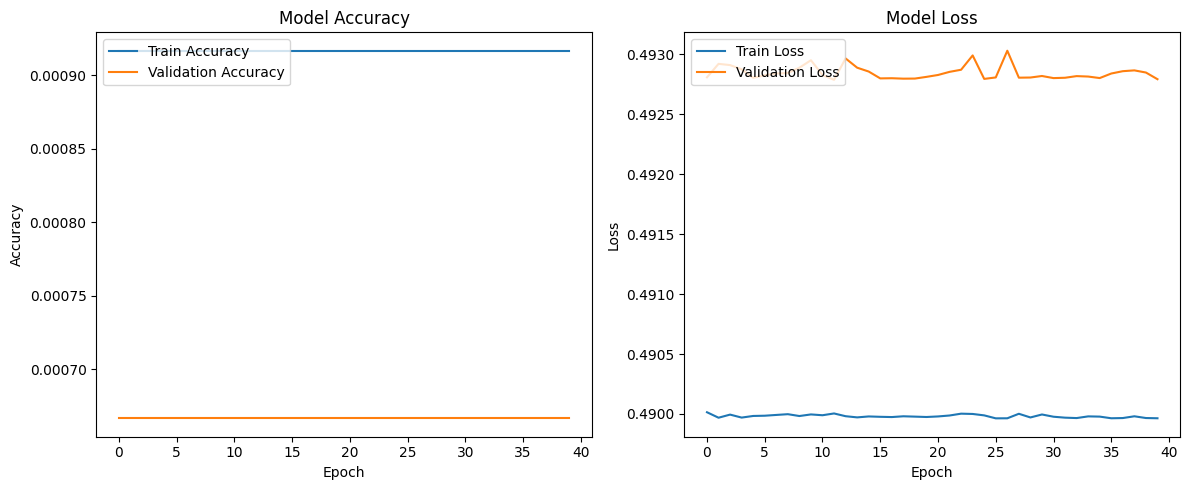

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Here We Observe That Random Forest Do Best Result For This Prediction

In [67]:
model.predict([[1,0.813559,0.965517,0.622951,0.840909]])

c:\Users\Ganesh prasad sahoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.72415335])

Create A code for prediction

In [72]:
df.columns

Index(['Gender', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'], dtype='object')

In [86]:

def predict_calories(gender, age, duration, heart_rate, body_temp):
    input_data = pd.DataFrame({
        'Gender': [gender],  
        'Age': [age],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [body_temp]
    })
    predicted_calories = model.predict(input_data)
    return predicted_calories[0]

gender_input = 1  
age_input = 23
duration_input = 56
heart_rate_input = 78
body_temp_input = 37

calories_output = predict_calories(gender_input, age_input, duration_input, heart_rate_input, body_temp_input)

print(f"Predicted Calories: {calories_output:.2f}")


Predicted Calories: 0.94


In [88]:
import joblib
joblib.dump(model,"caloriburntprediction.joblib")

['caloriburntprediction.joblib']